## U.S. EPA Pollution data analysis
Data obtained from: https://www.kaggle.com/sogun3/uspollution#

In [7]:
#import libraries
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style="darkgrid")

In [4]:
#set working directory
os.chdir('C:\\Users\\Anika\\Documents\\GradSchool\\Portfolio\\EPA_pollution')
os.getcwd() #get wd

'C:\\Users\\Anika\\Documents\\GradSchool\\Portfolio\\EPA_pollution'

In [6]:
data = pd.read_csv("pollution_us_2000_2016.csv")

In [12]:
list(data.columns) 

['Unnamed: 0',
 'State Code',
 'County Code',
 'Site Num',
 'Address',
 'State',
 'County',
 'City',
 'Date Local',
 'NO2 Units',
 'NO2 Mean',
 'NO2 1st Max Value',
 'NO2 1st Max Hour',
 'NO2 AQI',
 'O3 Units',
 'O3 Mean',
 'O3 1st Max Value',
 'O3 1st Max Hour',
 'O3 AQI',
 'SO2 Units',
 'SO2 Mean',
 'SO2 1st Max Value',
 'SO2 1st Max Hour',
 'SO2 AQI',
 'CO Units',
 'CO Mean',
 'CO 1st Max Value',
 'CO 1st Max Hour',
 'CO AQI']

In [13]:
data_top = data.head()
data_top

,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,1.145833,4.2,21,NaN
1,1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,0.878947,2.2,23,25.0
2,2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,1.145833,4.2,21,NaN
3,3,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,0.878947,2.2,23,25.0
4,4,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,...,Parts per billion,1.958333,3.0,22,4.0,Parts per million,0.850000,1.6,23,NaN


In [19]:
# group by State, City, Date Local and get mean daily value of NO2 Mean, O3 Mean, SO2 Mean, CO Mean
tbl = data.groupby(['State','City','Date Local']).agg(NO2 = ('NO2 Mean', 'mean'),
                                                    O3 = ('O3 Mean', 'mean'),
                                                    SO2 = ('SO2 Mean', 'mean'),
                                                    CO = ('CO Mean', 'mean'),
                                                    count = ('NO2 Mean', 'count')).reset_index()
tbl.head()

,State,City,Date Local,NO2,O3,SO2,CO,count
0,Alabama,Birmingham,2013-12-01,17.208333,0.013542,0.285390,0.262879,4
1,Alabama,Birmingham,2013-12-02,20.687500,0.009375,0.531666,0.352812,4
2,Alabama,Birmingham,2013-12-03,14.912500,0.008167,0.252632,0.237575,4
3,Alabama,Birmingham,2013-12-04,7.825000,0.011125,0.123052,0.115152,4
4,Alabama,Birmingham,2013-12-05,8.004762,0.010083,-0.014285,0.117575,4


In [20]:
tbl.describe()

,NO2,O3,SO2,CO,count
count,384649.000000,384649.000000,384649.000000,384649.000000,384649.000000
mean,12.598058,0.026208,1.877729,0.363380,4.540922
std,9.374161,0.011377,2.761468,0.310372,1.902922
min,-2.000000,0.000000,-1.725155,-0.420833,1.000000
25%,5.666667,0.017958,0.259007,0.185326,4.000000
50%,10.565217,0.025980,0.987500,0.289862,4.000000
75%,17.409091,0.034000,2.345963,0.457090,4.000000
max,139.541667,0.095083,321.612500,7.151993,324.000000


In [39]:
tbl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384649 entries, 0 to 384648
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   State       384649 non-null  object        
 1   City        384649 non-null  object        
 2   Date Local  384649 non-null  datetime64[ns]
 3   NO2         384649 non-null  float64       
 4   O3          384649 non-null  float64       
 5   SO2         384649 non-null  float64       
 6   CO          384649 non-null  float64       
 7   count       384649 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 23.5+ MB


In [38]:
from datetime import date
# convert the 'Date' column to datetime format
tbl['Date Local']= pd.to_datetime(tbl['Date Local'])

In [51]:
#Extract year to a new column
tbl['Year'] = pd.DatetimeIndex(tbl['Date Local']).year

In [26]:
print('number of cities:', tbl['City'].nunique())
print('number of rows:', tbl.shape[0])

number of cities: 144
number of rows: 384649


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000296107C1390>],
      dtype=object)

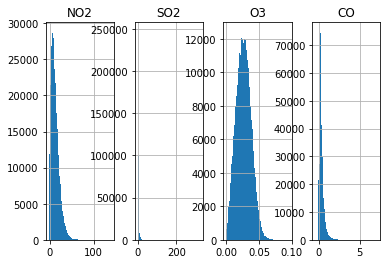

In [29]:
#histogram of each pollutant
fig, axes = plt.subplots(1, 4)

tbl.hist('NO2', bins=100, ax=axes[0])
tbl.hist('SO2', bins=100, ax=axes[1])
tbl.hist('O3', bins=100, ax=axes[2])
tbl.hist('CO', bins=100, ax=axes[3])

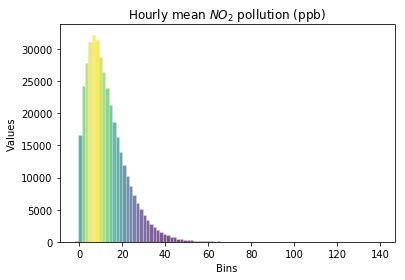

In [35]:
n, bins, patches = plt.hist(tbl['NO2'], bins=90, facecolor='#2ab0ff', edgecolor='#e0e0e0', linewidth=0.5, alpha=0.7)

n = n.astype('int') # it MUST be integer
# Good old loop. Choose colormap of your taste
for i in range(len(patches)):
    patches[i].set_facecolor(plt.cm.viridis(n[i]/max(n)))
# Make one bin stand out   
patches[47].set_fc('red') # Set color
patches[47].set_alpha(1) # Set opacity
# Add annotation
#plt.annotate('Important Bar!', xy=(0.57, 175), xytext=(2, 130), fontsize=15, arrowprops={'width':0.4,'headwidth':7,'color':'#333333'})
# Add title and labels with custom font sizes
plt.title('Hourly mean $NO_{2}$ pollution (ppb)', fontsize=12)
plt.xlabel('Bins', fontsize=10)
plt.ylabel('Values', fontsize=10)
plt.show()

Year
2000    21769
2001    20747
2002    21453
2003    19997
2004    18937
2005    19318
2006    22638
2007    25368
2008    26775
2009    22968
2010    22083
2011    26535
2012    26737
2013    27845
2014    27733
2015    28012
2016     5734
dtype: int64


Text(0,0.5,'Total NO2')

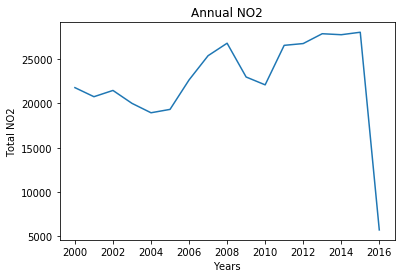

In [55]:
#NO2 by month
no2_by_year = tbl.groupby('Year').size()
print(no2_by_year)
#Plotting the Graph
plot_by_year = no2_by_year.plot(title='Annual NO2',)
plot_by_year.set_xlabel('Years')
plot_by_year.set_ylabel('Total NO2')

In [52]:
#Get annual max pollution value for each city then plot
tbl_year = tbl.groupby(['State','City','Year']).agg(NO2 = ('NO2', max),
                                                    O3 = ('O3', max),
                                                    SO2 = ('SO2', max),
                                                    CO = ('CO', max)).reset_index()
tbl_year.head()

,State,City,Year,NO2,O3,SO2,CO
0,Alabama,Birmingham,2013,25.329167,0.026333,4.616234,0.424053
1,Alabama,Birmingham,2014,58.581818,0.045792,8.950000,0.696896
2,Alabama,Birmingham,2015,20.604167,0.045375,8.105953,0.445833
3,Alabama,Birmingham,2016,21.670833,0.044208,4.867208,0.625568
4,Alaska,Fairbanks,2014,28.995455,0.028750,22.726397,1.288641


## Part 1: Relationship between each pairwise set of pollutants
Note: good seaborn graphing tutorial at: https://seaborn.pydata.org/tutorial/relational.html

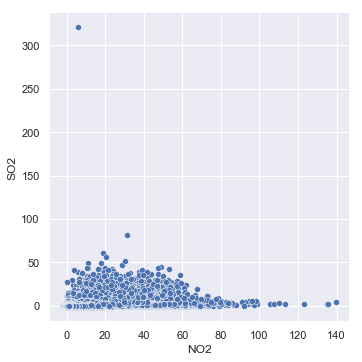

In [59]:
sns.relplot(x="NO2", y="SO2", data=tbl);

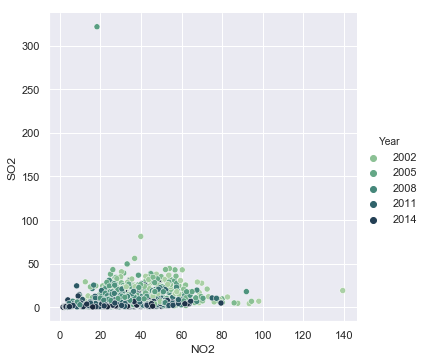

In [61]:
sns.relplot(x="NO2", y="SO2", hue="Year", palette="ch:r=-.5,l=.75", data=tbl_year);

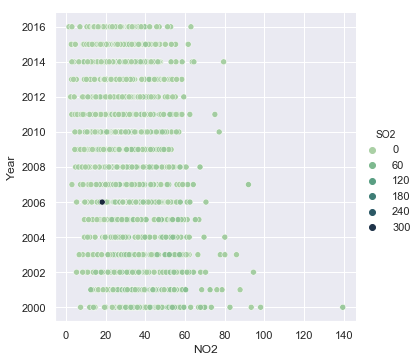

In [63]:
sns.relplot(x="NO2", y="Year", hue="SO2", palette="ch:r=-.5,l=.75", data=tbl_year);

C:\Users\Anika\Miniconda3\lib\site-packages\seaborn\relational.py:929: UserWarning: relplot is a figure-level function and does not accept the ax= paramter. You may wish to try scatterplot
  warnings.warn(msg, UserWarning)
C:\Users\Anika\Miniconda3\lib\site-packages\seaborn\relational.py:929: UserWarning: relplot is a figure-level function and does not accept the ax= paramter. You may wish to try scatterplot
  warnings.warn(msg, UserWarning)
C:\Users\Anika\Miniconda3\lib\site-packages\seaborn\relational.py:929: UserWarning: relplot is a figure-level function and does not accept the ax= paramter. You may wish to try scatterplot
  warnings.warn(msg, UserWarning)


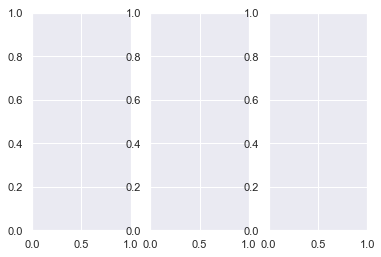

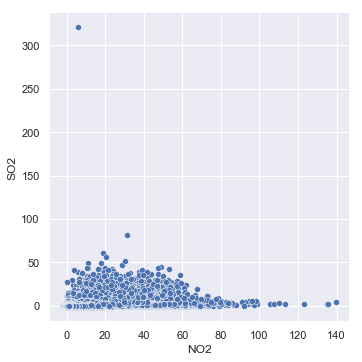

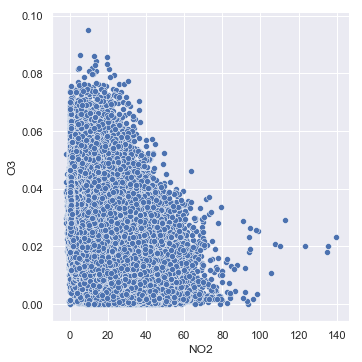

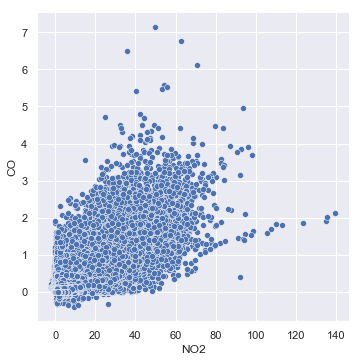

In [70]:
fig, axs = plt.subplots(ncols=3)
sns.relplot(x='NO2', y='SO2', data=tbl, ax=axs[0])
sns.relplot(x='NO2', y='O3', data=tbl, ax=axs[1])
sns.relplot(x='NO2', y='CO', data=tbl, ax=axs[2])

## Part 2: Time series for 5 worst pollution cities

In [71]:
#get max pollution for each city
tbl_city = tbl.groupby(['State','City']).agg(NO2 = ('NO2', max),
                                            O3 = ('O3', max),
                                            SO2 = ('SO2', max),
                                            CO = ('CO', max)).reset_index()

In [72]:
tbl_city.head()

,State,City,NO2,O3,SO2,CO
0,Alabama,Birmingham,58.581818,0.045792,8.950000,0.696896
1,Alaska,Fairbanks,49.795833,0.039042,31.506250,1.943542
2,Arizona,Phoenix,73.285714,0.063167,12.145834,3.293750
3,Arizona,Scottsdale,139.541667,0.045944,19.162500,2.135416
4,Arizona,Tucson,37.111111,0.059167,7.618750,1.256250


In [90]:
# five largest values in column 
top5_no2 = tbl_city.nlargest(5, ['NO2'])['City'].tolist()
print('NO2:',top5_no2)
top5_o3 = tbl_city.nlargest(5, ['O3'])['City'].tolist()
print('O3:',top5_o3)
top5_so2 = tbl_city.nlargest(5, ['SO2'])['City'].tolist()
print('SO2:',top5_so2)
top5_co = tbl_city.nlargest(5, ['CO'])['City'].tolist()
print('CO:',top5_co)
top5 = list(set(top5_no2) | set(top5_o3) | set(top5_so2) | set(top5_co))
print('top list:', top5)

NO2: ['Scottsdale', 'Los Angeles', 'Burbank', 'Welby', 'Long Beach']
O3: ['Norristown', 'Capitan', 'Holtsville', 'Victorville', 'Bristol']
SO2: ['Park Hill', 'East Saint Louis', 'New York', 'Johnstown', 'Washington']
CO: ['Calexico', 'Mexicali', 'Burbank', 'Chula Vista', 'Hawthorne']
top list: ['Holtsville', 'Hawthorne', 'Park Hill', 'Calexico', 'Johnstown', 'Victorville', 'East Saint Louis', 'Burbank', 'Bristol', 'Mexicali', 'Scottsdale', 'Capitan', 'Welby', 'Los Angeles', 'Long Beach', 'New York', 'Washington', 'Chula Vista', 'Norristown']


In [92]:
# make table with only cities in top 5 polluters for a category
tbl_top = tbl[tbl['City'].isin(top5)]
tbl_top.head()

,State,City,Date Local,NO2,O3,SO2,CO,count,Year
7031,Arizona,Scottsdale,2000-01-01,47.208333,0.019750,1.743750,0.704276,4,2000
7032,Arizona,Scottsdale,2000-01-02,28.083333,0.014250,1.368750,0.514583,4,2000
7033,Arizona,Scottsdale,2000-01-03,62.714286,0.016292,1.016666,1.200947,4,2000
7034,Arizona,Scottsdale,2000-01-04,56.250000,0.023333,0.743750,0.695833,4,2000
7035,Arizona,Scottsdale,2000-01-05,105.500000,0.010667,1.645833,1.581250,4,2000


In [94]:
# wide to long (so pollutants are a column we can facet over)
tbl_top_long = pd.melt(tbl_top, id_vars=['State','City','Date Local','count','Year'], value_vars=['NO2','O3','SO2','CO'])
tbl_top_long.head()

,State,City,Date Local,count,Year,variable,value
0,Arizona,Scottsdale,2000-01-01,4,2000,NO2,47.208333
1,Arizona,Scottsdale,2000-01-02,4,2000,NO2,28.083333
2,Arizona,Scottsdale,2000-01-03,4,2000,NO2,62.714286
3,Arizona,Scottsdale,2000-01-04,4,2000,NO2,56.250000
4,Arizona,Scottsdale,2000-01-05,4,2000,NO2,105.500000


ValueError: Could not interpret value `value` for parameter `y`

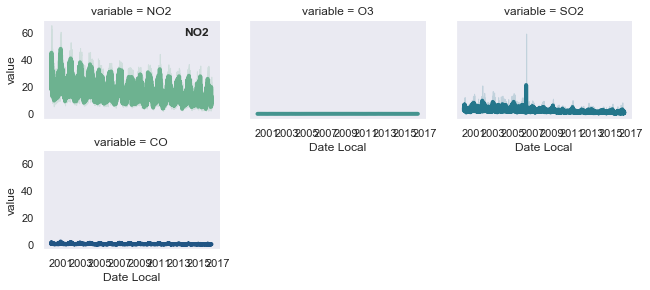

In [96]:
sns.set_theme(style="dark")

# Plot each pollutants's time series in its own facet
g = sns.relplot(
    data=tbl_top_long,
    x="Date Local", y="value", col="variable", hue="variable",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, height=2, aspect=1.5, legend=False,
)

# Iterate over each subplot to customize further
for year, ax in g.axes_dict.items():

    # Add the title as an annotation within the plot
    ax.text(.8, .85, year, transform=ax.transAxes, fontweight="bold")

    # Plot every year's time series in the background
    sns.lineplot(
        data=tbl_top_long, x="Date Local", y="value", units="Year",
        estimator=None, color=".7", linewidth=1, ax=ax,
    )

# Reduce the frequency of the x axis ticks
ax.set_xticks(ax.get_xticks()[::2])

# Tweak the supporting aspects of the plot
g.set_titles("")
g.set_axis_labels("", "pollutant level")
g.tight_layout()

## Part 3: Map of maximum hourly pollution recorded in each city

## Part 4: Machine learning models to predict pollution